In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import seaborn as sns

In [20]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = (12,8)

In [11]:
df = pd.read_csv(r"C:\Users\srmaurya\Documents\New folder\AB_NYC_2019.csv")

In [118]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [13]:
df= df.drop(df[(df['minimum_nights']>365)].index)
df= df.drop(df[(df['number_of_reviews']>500)].index)
df= df.drop(df[(df['calculated_host_listings_count']>100)].index)
df= df.drop(df[(df['price']>1800)].index)
df= df.drop(df[(df['price']<1)].index)

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.796200e+04,4.796200e+04,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000,38438.000000,47962.000000,47962.000000
mean,1.885598e+07,6.635704e+07,40.728804,-73.951599,142.747571,6.519599,23.580668,1.372987,3.395563,109.856365
std,1.095187e+07,7.811386e+07,0.054881,0.046162,131.386068,16.096102,44.306458,1.679036,9.914673,130.402201
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.381501e+06,7.603955e+06,40.689620,-73.982420,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.947165e+07,2.986915e+07,40.722800,-73.955260,105.000000,2.000000,5.000000,0.710000,1.000000,41.000000
75%,2.881982e+07,1.044658e+08,40.763317,-73.935823,175.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1800.000000,365.000000,488.000000,58.500000,96.000000,365.000000


In [14]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
neighbour_group_df =df.pivot_table('price', ['neighbourhood_group'], aggfunc='mean').reset_index()

Text(0.5, 1.0, 'Average Price based on the Neighbourhood Groups')

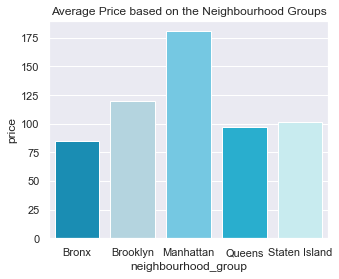

In [131]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

sns.set(rc={'figure.figsize':(5,4)})

ax = sns.barplot(x="neighbourhood_group", y="price", data=neighbour_group_df,
                 palette=color_palette_list[0:5])

ax.set_title('Average Price based on the Neighbourhood Groups')

In [137]:
roomdf = df.groupby('room_type').size()/df['room_type'].count()*100

labels = roomdf.index
values = roomdf.values

In [138]:
roomdf.head()

room_type
Entire home/apt    51.351070
Private room       46.236604
Shared room         2.412326
dtype: float64

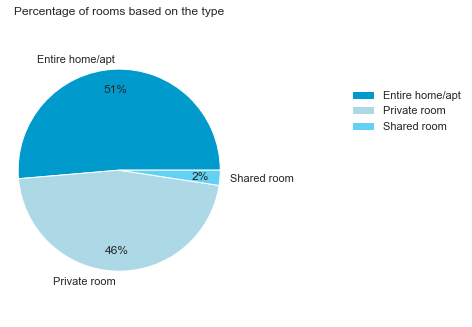

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 5.5)
ax.pie(values, labels=labels,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.8,labeldistance=1.1)

ax.axis('equal')

ax.set_title("Percentage of rooms based on the type")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

In [140]:
neighbour_df =df.pivot_table(['price', 'number_of_reviews', 'calculated_host_listings_count', 
                              'neighbourhood_group' ] , ['neighbourhood'], aggfunc='mean').reset_index()

neighbour_df.neighbourhood[1]

'Arden Heights'

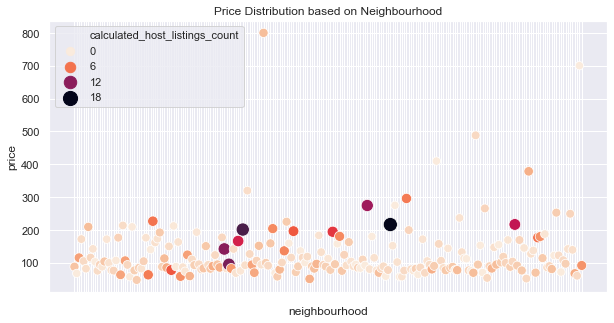

In [141]:
plt.figure(figsize=(10,5))

pl = sns.scatterplot(data = neighbour_df, x = "neighbourhood", y="price", hue= "calculated_host_listings_count",
                size="calculated_host_listings_count", sizes=(70, 200), palette = "rocket_r")

pl.set_xticklabels(
    pl.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right', 
);

pl.set_title('Price Distribution based on Neighbourhood');